In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Generate non-linear data
np.random.seed(0)
x=np.linspace(0,5,100)
y = 0.5 * x**2 -2 *x + 1 + np.random.normal (0, 1, 100)

In [4]:
x = x[:, np.newaxis]

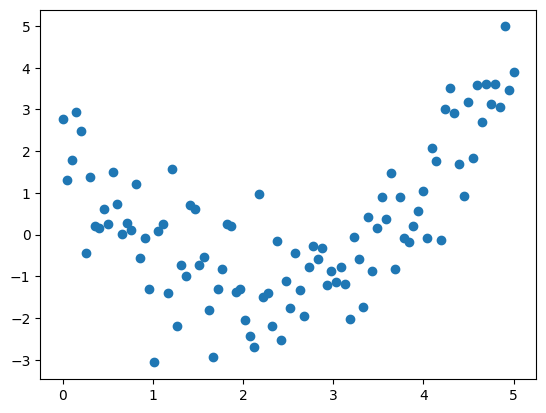

In [6]:
plt.scatter(x,y)
plt.show()

In [19]:
# instantiating the model
simple_linear_model=LinearRegression()

In [20]:
simple_linear_model.fit(x,y)

LinearRegression()

In [24]:
simple_linear_model.coef_

array([0.44053463])

In [25]:
simple_linear_model.intercept_

np.float64(-0.8538181144473558)

In [26]:
simple_y_predictions=simple_linear_model.predict(x)

In [27]:
# check the residuals
residuals = y - simple_y_predictions
residuals

array([ 3.61787046,  2.13199138,  2.59113897,  3.73641176,  3.24874489,
        0.29212811,  2.11026427,  0.90213926,  0.84614899,  1.25838848,
        0.89280645,  2.10656004,  1.31939867,  0.58866114,  0.8220253 ,
        0.62556309,  1.70224529, -0.07816383,  0.36144111, -0.88179259,
       -2.65420617,  0.4814335 ,  0.62383312, -1.04863532,  1.89996786,
       -1.88491814, -0.44300889, -0.73161543,  0.93523421,  0.8212511 ,
       -0.54117214, -0.36341819, -1.67227684, -2.80564718, -1.21057172,
       -0.7415687 ,  0.29966567,  0.24159826, -1.37571423, -1.31574522,
       -2.08449973, -2.47591824, -2.77957328,  0.86262029, -1.61010855,
       -1.54828117, -2.37020196, -0.34456523, -2.73805165, -1.33644154,
       -2.01616452, -0.7282414 , -1.61784421, -2.27701568, -1.11135938,
       -0.63908818, -0.98259496, -0.72578166, -1.63916627, -1.3416252 ,
       -1.62283358, -1.27886463, -1.69884533, -2.57581847, -0.63339578,
       -1.17133815, -2.3559401 , -0.21659327, -1.53775691, -0.52

In [31]:
# polynomial transformations
degree = PolynomialFeatures(degree=3)
X_poly = degree.fit_transform(x)

In [32]:
poly_model = LinearRegression()

In [33]:
poly_model.fit(X_poly,y)

LinearRegression()

In [34]:
poly_model.coef_

array([ 0.        , -3.02045551,  0.66950609,  0.00502585])

In [35]:
poly_model.intercept_

np.float64(2.032617865056091)

In [36]:
y_poly=poly_model.predict(X_poly)

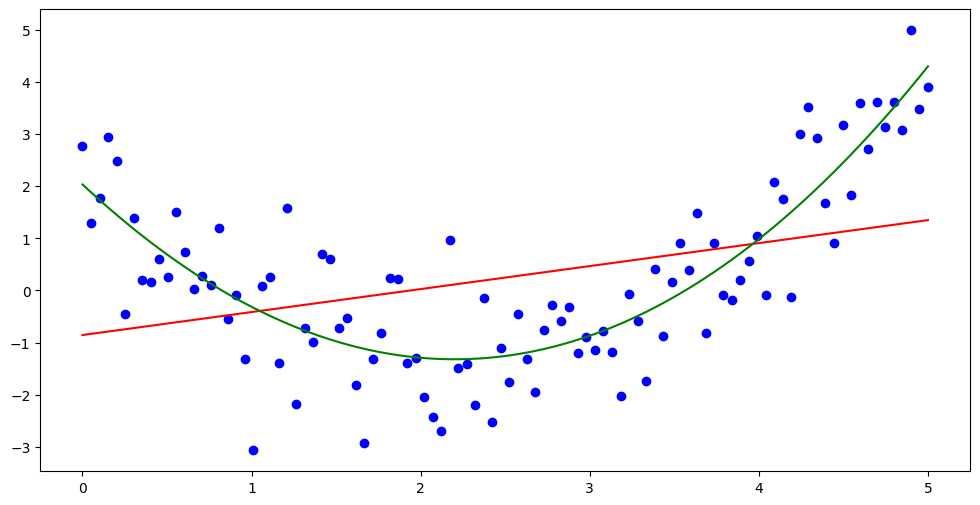

In [37]:
plt.figure(figsize= (12,6))
plt.scatter(x,y,color='blue')
plt.plot(x,simple_y_predictions,color='red')
plt.plot(x,y_poly,color='green')
plt.show()


**Applying Regularization**

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso

In [47]:
# 2 parameters;degree and lambda to apply within Regularization

degree=20
alpha = 100

In [48]:
model_pipeline=make_pipeline(PolynomialFeatures(degree=degree),Ridge(alpha=alpha))

In [49]:
model_pipeline.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('ridge', Ridge(alpha=100))])

In [50]:
y_ridge=model_pipeline.predict(x)
y_ridge

array([ 0.63096101,  0.62738388,  0.62336917,  0.61884052,  0.61370438,
        0.60784588,  0.6011239 ,  0.59336559,  0.58436043,  0.57385427,
        0.56154398,  0.54707328,  0.53003078,  0.50995092,  0.48631885,
        0.45857999,  0.42615472,  0.38845859,  0.34492786,  0.29504971,
        0.23839617,  0.17466016,  0.10369171,  0.02553214, -0.05955636,
       -0.15106818, -0.24824117, -0.35005501, -0.45524255, -0.56231515,
       -0.66960183, -0.77530172, -0.87754781, -0.9744795 , -1.0643205 ,
       -1.14545792, -1.21651806, -1.27643421, -1.32450177, -1.36041662,
       -1.38429325, -1.39666031, -1.3984324 , -1.39085848, -1.37544883,
       -1.35388403, -1.32791081, -1.29923103, -1.26939085, -1.23967764,
       -1.21103231, -1.18398408, -1.15861363, -1.13454905, -1.11099672,
       -1.0868068 , -1.06057045, -1.03074264, -0.99578243, -0.9542996 ,
       -0.90519558, -0.84778513, -0.78188601, -0.70786483, -0.62663002,
       -0.53956674, -0.44841331, -0.35508435, -0.2614524 , -0.16

In [51]:
residuals = y_ridge-y
residuals

array([-2.13309134, -0.67303861, -1.15845013, -2.33050079, -1.87021928,
        1.05828976, -0.7888176 ,  0.38929988,  0.41403577, -0.0309591 ,
        0.30006341, -0.9504101 , -0.20254046,  0.48586799,  0.20662254,
        0.35309667, -0.77826004,  0.94220373,  0.43681884,  1.60792517,
        3.30143598,  0.07981108, -0.15580621,  1.41625343, -1.63968747,
        2.03143748,  0.47010601,  0.6346495 , -1.15963691, -1.17497562,
        0.05791172, -0.24779135,  0.93657199,  1.95076141,  0.24359573,
       -0.32879393, -1.46333767, -1.48743563,  0.05956007, -0.058573  ,
        0.66405566,  1.02085788,  1.3004916 , -2.35637727,  0.10951199,
        0.04700019,  0.87264498, -1.1465612 ,  1.25451618, -0.13962994,
        0.54648914, -0.73663497,  0.15608907,  0.81707589, -0.3472773 ,
       -0.81760781, -0.47011389, -0.71934861,  0.20674699, -0.07156047,
        0.23650271, -0.07230502,  0.39132557,  1.32007066, -0.56336643,
        0.03938999,  1.29289615, -0.77537095,  0.61717542, -0.32

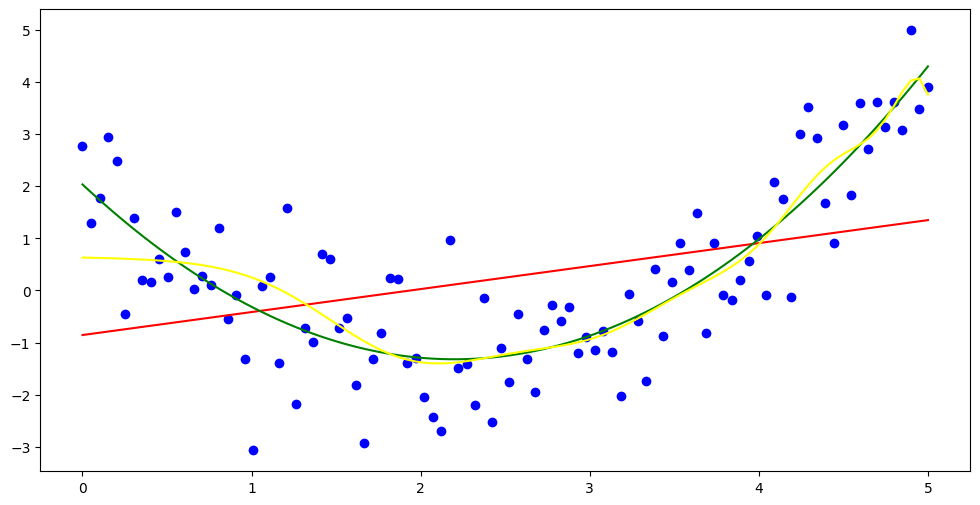

In [52]:
plt.figure(figsize= (12,6))
plt.scatter(x,y,color='blue')
plt.plot(x,simple_y_predictions,color='red')
plt.plot(x,y_poly,color='green')
plt.plot(x,y_ridge,color='yellow')
plt.show()
